# **ML On TF-IDF**

In [ ]:

X_train = pickle.load(open("/content/drive/MyDrive/Personal_Project/Fetures_Extraction/TFIDF/tfidf_X_train","rb"))
X_test = pickle.load(open("/content/drive/MyDrive/Personal_Project/Fetures_Extraction/TFIDF/tfidf_X_test","rb"))
y_train = pd.read_csv('/content/drive/MyDrive/Personal_Project/Fetures_Extraction/TFID_Weighted_W2V/tfidf_w2v_test_y.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Personal_Project/Fetures_Extraction/TFID_Weighted_W2V/tfidf_w2v_train_y.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 40000)
(30000, 40000)
(70000, 1)
(30000, 1)


# **Logistic Regression**

For values of alpha =  1e-05 The log loss is: 0.5394247521413
For values of alpha =  0.0001 The log loss is: 0.5439507068818819
For values of alpha =  0.001 The log loss is: 0.5717202692438471
For values of alpha =  0.01 The log loss is: 0.5963944447526353
For values of alpha =  0.1 The log loss is: 0.643332819938788
For values of alpha =  1 The log loss is: 0.6511025880218158
For values of alpha =  10 The log loss is: 0.6518009883305877


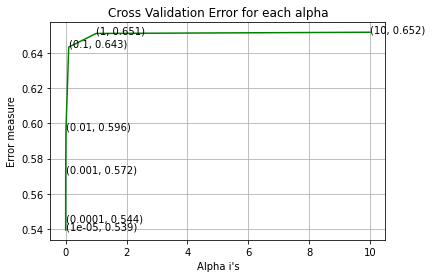

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  1e-05 The train log loss is: 0.4362013191694408
For values of best alpha =  1e-05 The test log loss is: 0.5394247521413
Total number of data points : 30000


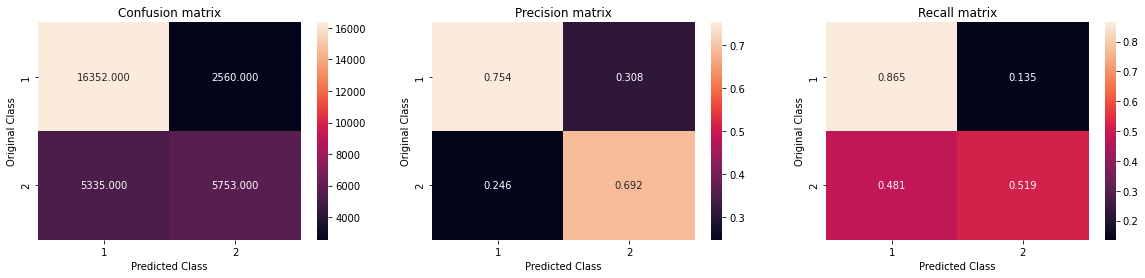

In [ ]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
y_test.values

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
pred = np.argmax(predict_y,axis=1)
pred = pred.reshape(-1,1)

In [ ]:
pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.81     18912
           1       0.69      0.52      0.59     11088

    accuracy                           0.74     30000
   macro avg       0.72      0.69      0.70     30000
weighted avg       0.73      0.74      0.73     30000



# **Linear SVM with hinge Loss**

For values of alpha =  1e-05 The log loss is: 0.5525064436903558
For values of alpha =  0.0001 The log loss is: 0.5444042421387661
For values of alpha =  0.001 The log loss is: 0.5765658935650594
For values of alpha =  0.01 The log loss is: 0.585242405349183
For values of alpha =  0.1 The log loss is: 0.6518235293362067
For values of alpha =  1 The log loss is: 0.6518235293339621
For values of alpha =  10 The log loss is: 0.6518235293361252


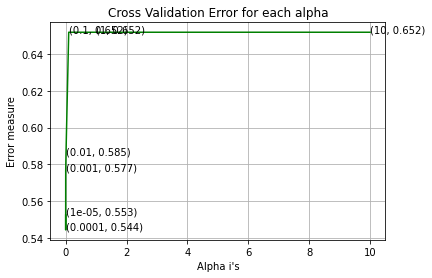

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  0.0001 The train log loss is: 0.48846721940918764
For values of best alpha =  0.0001 The test log loss is: 0.5444042421387661
Total number of data points : 30000


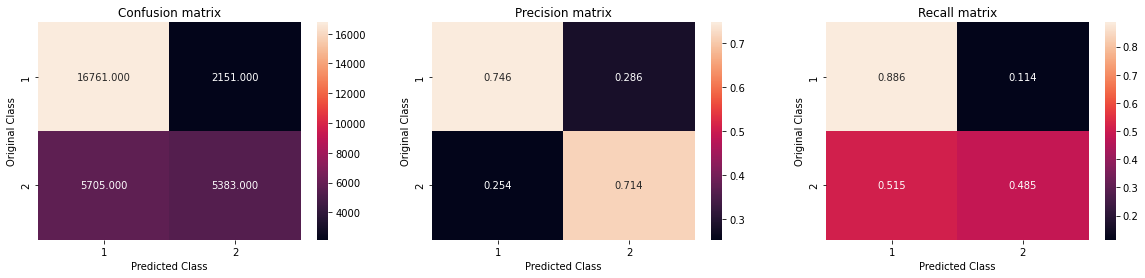

In [ ]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
y_test.values

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
pred = np.argmax(predict_y,axis=1)
pred = pred.reshape(-1,1)

In [ ]:
pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81     18912
           1       0.71      0.49      0.58     11088

    accuracy                           0.74     30000
   macro avg       0.73      0.69      0.69     30000
weighted avg       0.73      0.74      0.72     30000

